In [1]:
# Load libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt #so you can draw


In [2]:
# load dataset
data = pd.read_csv("SaYoPillow.csv")

data = data.rename(columns = {'sr' :'snoing rate' , 'rr': 'respiration rate', 't':'body temperature','lm':'limb movement', 'bo':'blood oxygen','rem': 'eye movement'
                              , 'sr.1': 'sleeping hours', 'hr':'heart rate','sl': 'outcome'})
#take a peek to see if this looks right
data.head() #optional

,snoing rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,outcome
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(data.drop('outcome', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data.drop('outcome',axis=1))
# Here we have the standardized dataset, minus the 
# target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#see what you did
data_feat.head()

,snoing rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636


In [4]:
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
data_feat.head()

,snoing rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636


In [5]:
X = data_feat
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% 

In [6]:
def varyK(k, distMetric):
    results = []
    for i in range(1, k+1):
        model = KNeighborsClassifier(n_neighbors=i, metric=distMetric)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.accuracy_score(y_test, y_test_pred))
    return results

In [7]:
EucAccuracy = varyK(400, 'euclidean')
ManAccuracy = varyK(400, 'manhattan')
ChedAccuracy = varyK(400,'chebyshev' )

In [8]:
kneighbors = [*range(1, 401)]

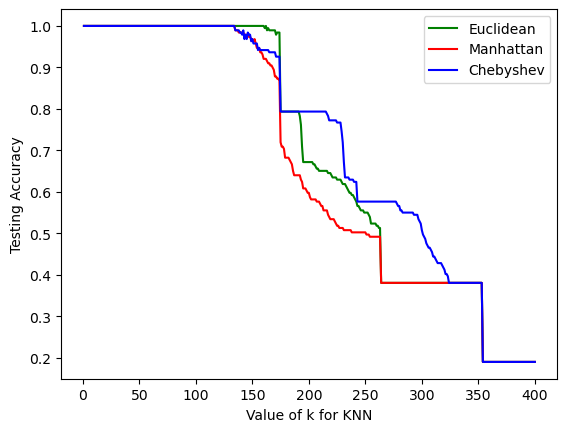

In [9]:
fig, ax = plt.subplots()
ax.plot(kneighbors, EucAccuracy, color='green', label='Euclidean')
ax.plot(kneighbors, ManAccuracy, color='red', label='Manhattan')
ax.plot(kneighbors, ChedAccuracy, color='blue', label='Chebyshev')
ax.legend(loc= 'upper right')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [10]:
EucAccuracy = varyK(250, 'euclidean')
ManAccuracy = varyK(250, 'manhattan')
ChedAccuracy = varyK(250,'chebyshev' )

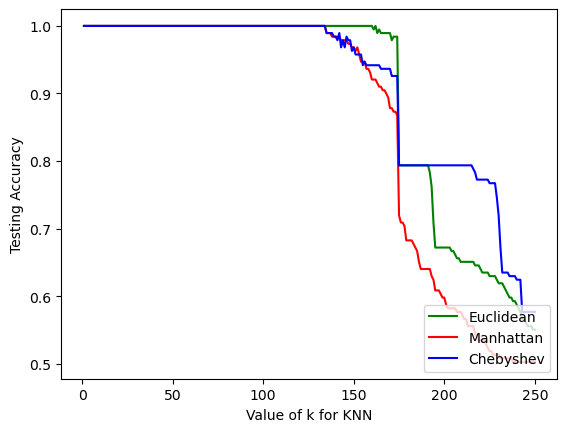

In [11]:
kneighbors = [*range(1, 251)]

fig, ax = plt.subplots()
ax.plot(kneighbors, EucAccuracy, color='green', label='Euclidean')
ax.plot(kneighbors, ManAccuracy, color='red', label='Manhattan')
ax.plot(kneighbors, ChedAccuracy, color='blue', label='Chebyshev')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
ax.legend(loc= 'lower right')
plt.show()

In [12]:
import math
#number of n =
n = X_train.shape[0]#how many samples in training
print(n)
print(math.sqrt(n))

441
21.0


In [13]:
def varyWeightedK(k, distMetric):
    results = []
    for i in range(1, k+1): 
        model = KNeighborsClassifier(n_neighbors=i,weights='distance', metric=distMetric)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.accuracy_score(y_test, y_test_pred))
    return results

In [14]:
EucWeightedAccuracy = varyWeightedK(400,'euclidean')
ManWeightedAccuracy = varyWeightedK(400,'manhattan')
ChedWeightedAccuracy = varyWeightedK(400,'chebyshev')

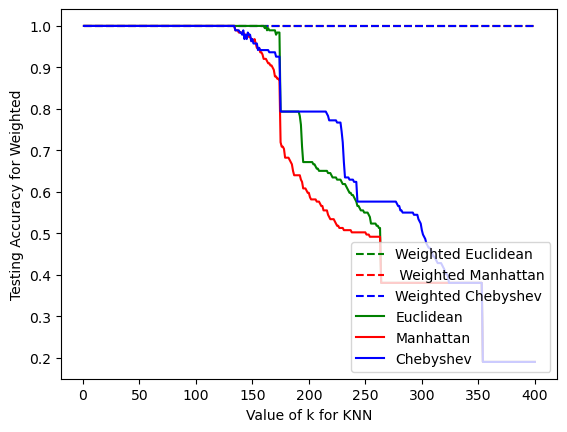

In [15]:

EucAccuracy = varyK(400, 'euclidean')
ManAccuracy = varyK(400, 'manhattan')
ChedAccuracy = varyK(400,'chebyshev' )


kneighbors = [*range(1, 401)]

fig, ax = plt.subplots()
ax.plot(kneighbors, EucWeightedAccuracy, color='green', label='Weighted Euclidean', linestyle='--')
ax.plot(kneighbors, ManWeightedAccuracy, color='red', label=' Weighted Manhattan',linestyle='--')
ax.plot(kneighbors, ChedWeightedAccuracy, color='blue', label='Weighted Chebyshev',linestyle='--')
ax.plot(kneighbors, EucAccuracy, color='green', label='Euclidean')
ax.plot(kneighbors, ManAccuracy, color='red', label='Manhattan')
ax.plot(kneighbors, ChedAccuracy, color='blue', label='Chebyshev')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy for Weighted')
ax.legend(loc= 'lower right')
plt.show()

In [16]:
for count, value in enumerate(EucAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {EucAccuracy.index(max(EucAccuracy))+1} acc: {EucAccuracy[EucAccuracy.index(max(EucAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [17]:
for count, value in enumerate(ManAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {ManAccuracy.index(max(ManAccuracy))+1} acc: {ManAccuracy[ManAccuracy.index(max(ManAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [18]:
for count, value in enumerate(ChedAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {ChedAccuracy.index(max(ChedAccuracy))+1} acc: {ChedAccuracy[ChedAccuracy.index(max(ChedAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [19]:
for count, value in enumerate(EucWeightedAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {EucWeightedAccuracy.index(max(EucWeightedAccuracy))+1} acc: {EucWeightedAccuracy[EucWeightedAccuracy.index(max(EucWeightedAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [20]:
for count, value in enumerate(ManWeightedAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {ManWeightedAccuracy.index(max(ManWeightedAccuracy))+1} acc: {ManWeightedAccuracy[ManWeightedAccuracy.index(max(ManWeightedAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [21]:
for count, value in enumerate(ChedWeightedAccuracy):
    print(f'k: {count+1} accuracy:{value}')
print(f'Best k: {ChedWeightedAccuracy.index(max(ChedWeightedAccuracy))+1} acc: {ChedWeightedAccuracy[ChedWeightedAccuracy.index(max(ChedWeightedAccuracy))]}')

k: 1 accuracy:1.0
k: 2 accuracy:1.0
k: 3 accuracy:1.0
k: 4 accuracy:1.0
k: 5 accuracy:1.0
k: 6 accuracy:1.0
k: 7 accuracy:1.0
k: 8 accuracy:1.0
k: 9 accuracy:1.0
k: 10 accuracy:1.0
k: 11 accuracy:1.0
k: 12 accuracy:1.0
k: 13 accuracy:1.0
k: 14 accuracy:1.0
k: 15 accuracy:1.0
k: 16 accuracy:1.0
k: 17 accuracy:1.0
k: 18 accuracy:1.0
k: 19 accuracy:1.0
k: 20 accuracy:1.0
k: 21 accuracy:1.0
k: 22 accuracy:1.0
k: 23 accuracy:1.0
k: 24 accuracy:1.0
k: 25 accuracy:1.0
k: 26 accuracy:1.0
k: 27 accuracy:1.0
k: 28 accuracy:1.0
k: 29 accuracy:1.0
k: 30 accuracy:1.0
k: 31 accuracy:1.0
k: 32 accuracy:1.0
k: 33 accuracy:1.0
k: 34 accuracy:1.0
k: 35 accuracy:1.0
k: 36 accuracy:1.0
k: 37 accuracy:1.0
k: 38 accuracy:1.0
k: 39 accuracy:1.0
k: 40 accuracy:1.0
k: 41 accuracy:1.0
k: 42 accuracy:1.0
k: 43 accuracy:1.0
k: 44 accuracy:1.0
k: 45 accuracy:1.0
k: 46 accuracy:1.0
k: 47 accuracy:1.0
k: 48 accuracy:1.0
k: 49 accuracy:1.0
k: 50 accuracy:1.0
k: 51 accuracy:1.0
k: 52 accuracy:1.0
k: 53 accuracy:1.0
k:

In [22]:
chebKNN = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')
chebKNN.fit(X_train, y_train)
y_test_pred= chebKNN.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 1.0
